# 69 Export GemPy model into blender
This notebook illustrates how GemPy models can be import and editted in Blender. A few lines are added after computing a model as usual. A small custom script is executed in Blender (download for free here: https://www.blender.org/download/) to build surfaces into your scene. We show first steps to edit the model and make it visually more appealing by increasing surface thicknesses and adding colors. This model can be used easily for further animation steps, which is beyond the scope of this tutorial. We recommend to "build the popular Blender Donut" to understand the concepts of Blender like keyframing for animations (https://www.youtube.com/watch?v=LMA3S2EGM6U). 
<br></br>We want to mention Blender as an excellent tool to manually edit and export meshes for further compuational steps.

In [1]:
import gempy as gp
import pandas as pd
import numpy as np
import os

WARNING (aesara.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
file_path ='data/69_Gempy_to_Blender/'
# gg.download_gemgis_data.download_tutorial_data(filename="68_creating_finite_faults_with_gemgis.zip", dirpath=file_path)

### Read data generated from example 02

In [3]:
interfaces_coords = pd.read_csv(file_path + 'surfaces_example02.csv')
interfaces_coords

,Unnamed: 0,formation,geometry,X,Y,Z
0,0,P,POINT (1652.8907623591306 2.1487791778915835),1652.890762,2.148779,162.705959
1,1,P,POINT (1847.1027866783184 185.95658790855168),1847.102787,185.956588,196.793667
2,2,P,POINT (1994.4958408491307 342.0198217364706),1994.495841,342.019822,252.925457
3,3,P,POINT (2121.080463842887 484.21076811301884),2121.080464,484.210768,305.557260
4,4,P,POINT (2235.5268353166944 607.3273192439327),2235.526835,607.327319,349.545114
...,...,...,...,...,...,...
121,121,T,POINT (1476.886115319865 3471.087659986244),1476.886115,3471.087660,421.321855
122,122,T,POINT (1608.6728461078853 3525.7097918260156),1608.672846,3525.709792,436.155939
123,123,T,POINT (1768.204151798647 3591.603157220026),1768.204152,3591.603157,459.647882
124,124,T,POINT (1903.4589544495102 3650.560378888351),1903.458954,3650.560379,486.010124


In [4]:
orientations = pd.read_csv(file_path + 'orientations_example02.csv')
orientations

,Unnamed: 0,dip,azimuth,Z,geometry,polarity,formation,X,Y
0,0,23.226872,174.963534,250.0,POINT (1070.7098738335671 247.54737664772748),1.0,P,1070.709874,247.547377
1,1,22.257867,174.667406,350.0,POINT (1289.3121973006528 511.4405510986238),1.0,P,1289.312197,511.440551
2,2,21.786345,174.412613,450.0,POINT (1463.0788542159257 780.2269581935),1.0,P,1463.078854,780.226958
3,3,22.066141,174.294562,250.0,POINT (972.9319227505433 734.0203194834023),1.0,Q,972.931923,734.020319
4,4,22.175549,174.498431,450.0,POINT (732.9847007401183 1953.372711009733),1.0,R,732.984701,1953.372711
5,5,22.938797,173.778172,450.0,POINT (797.4691619398486 2204.6995438201116),1.0,S,797.469162,2204.699544
6,6,21.439609,173.811400,550.0,POINT (881.6782818594968 2462.9625203561745),1.0,S,881.678282,2462.962520
7,7,23.406748,174.121550,650.0,POINT (1009.3466773103917 2723.501419052229),1.0,S,1009.346677,2723.501419
8,8,21.789527,174.515310,450.0,POINT (1052.3887004456406 3474.4636111902337),1.0,T,1052.388700,3474.463611


### Create new Model

In [5]:
geo_model = gp.create_model('Model')


### Initiate Data

In [6]:
gp.init_data(geo_model, [0, 2932, 0, 3677, -700, 1000], [100, 100, 100],
             surface_points_df=interfaces_coords,
             orientations_df=orientations,
             default_values=True)

Active grids: ['regular']


Model  2023-10-23 13:59

In [7]:
gp.map_stack_to_surfaces(geo_model,
                         {'Strata': ('P', 'Q', 'R', 'S', 'T')},
                         remove_unused_series=True)
geo_model.add_surfaces('U')

,surface,series,order_surfaces,color,id
0,P,Strata,1,#015482,1
1,Q,Strata,2,#9f0052,2
2,R,Strata,3,#ffbe00,3
3,S,Strata,4,#728f02,4
4,T,Strata,5,#443988,5
5,U,Strata,6,#ff3f20,6


In [8]:
geo_model.set_topography(source='gdal', filepath='./data/example02/raster2.tif')

Cropped raster to geo_model.grid.extent.
depending on the size of the raster, this can take a while...
storing converted file...
Active grids: ['regular' 'topography']


Grid Object. Values: 
array([[  14.66      ,   18.385     , -691.5       ],
       [  14.66      ,   18.385     , -674.5       ],
       [  14.66      ,   18.385     , -657.5       ],
       ...,
       [2926.99658703, 3652.02038043,  629.80548096],
       [2926.99658703, 3662.01222826,  629.07196045],
       [2926.99658703, 3672.00407609,  628.35705566]])

In [9]:
gp.set_interpolator(geo_model,
                    theano_optimizer='fast_compile',
                    verbose=[],
                    update_kriging=False
                    )

Compiling aesara function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                         values
range              5000.695252
$C_o$            595403.642857
drift equations            [3]


In [10]:
sol = gp.compute_model(geo_model, compute_mesh=True)

C:\Users\chudalla\Desktop\Projects\gempy\env\lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


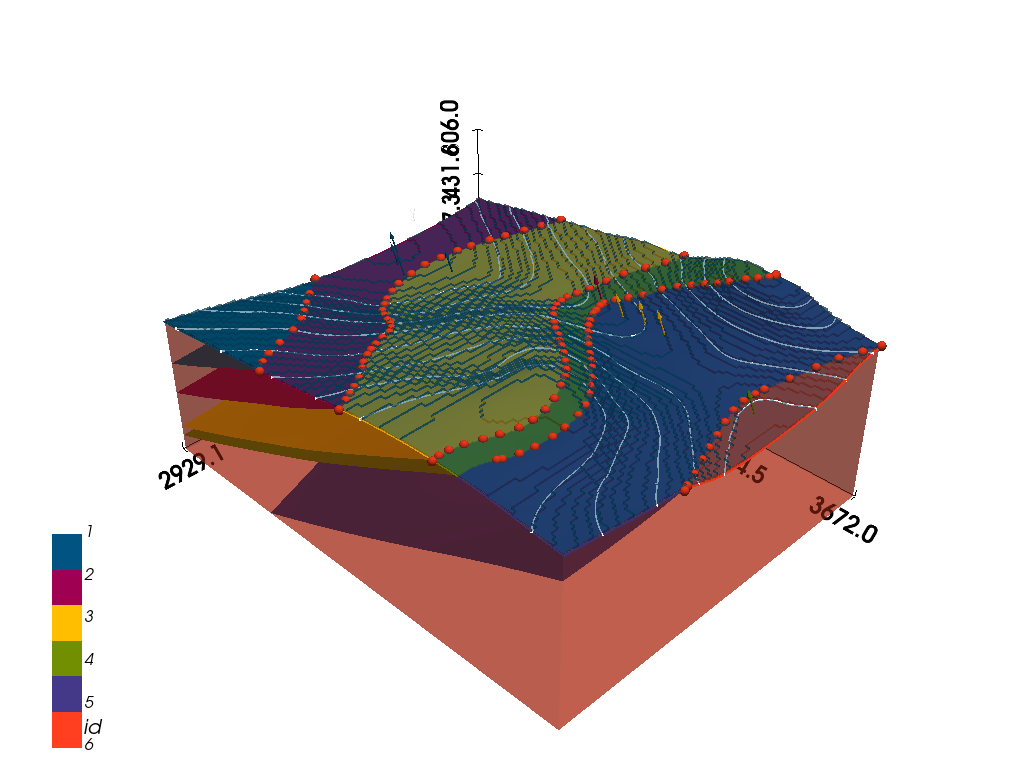

In [11]:
gpv = gp.plot_3d(geo_model, image=False, show_topography=True,
                 plotter_type='basic', notebook=True, show_lith=True)

## Get and store surfaces
In this step, the surface information (vertices and faces) is stored as npy files. Because Blender has a default origin at [0,0,0], real life coordinates can result in unhandy viewport navigation, we shift the model towards the default origin. For the same reason, we scale down the model to reduce the absolute width loaded into Blender. Depening on your aims, these steps might influence your outcome negatively!

In [12]:
try:
    os.mkdir('vertices')
    os.mkdir('faces')
    print('Folders for mesh data created')

except:
    print('Folders already exist')

Folders already exist


In [13]:
vertices, faces = gp.get_surfaces(geo_model)

# enter values to shift model
x0, y0, z0 = 0, 0, -700

# save model
for i in range(len(vertices)):
    np.save('vertices/' + 'vert_%02d.npy' %i, vertices[i]-[x0, y0, z0])
    np.save('faces/' + 'faces_%02d.npy' %i, faces[i])
    print(len(vertices[i]))

1462
5148
12222
13722
15834


## Import surface in Blender
Adjust the storage locations of your vertice and face data (Line 7,8) in the script 'gempy_to_blender.txt' (downloaded in "data/69_Gempy_to_Blender"). Open Blender and open the scripting tab. Copy and paste the code. Then press the run symbol. For further steps, check out the appended screencast.


In [14]:
%%HTML
<iframe width="560" height="315" src="https://www.youtube.com/embed/pDDMwdMjn3A?si=gnhr5tlTn1zj85OR" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>